<a href="https://colab.research.google.com/github/TranHaoDong/BT_AI_WEEK9-15/blob/main/Final_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
drive.mount('/content/drive',force_remount=True)

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train=train_datagen.flow_from_directory('/content/drive/MyDrive/Rice_Disease/Train',
                                               target_size=(64,64),
                                               batch_size=32,
                                               class_mode ='categorical')
test=train_datagen.flow_from_directory('/content/drive/MyDrive/Rice_Disease/Test',
                                               target_size=(64,64),
                                               batch_size=32,
                                               class_mode ='categorical')

Mounted at /content/drive
Found 1061 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


In [3]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense, Dropout, Activation

model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same',input_shape=(64,64,3)))
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer = 'he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu',kernel_initializer = 'he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(5,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        36928     
                                                        

In [4]:
# Thiết lập thông số
from keras.optimizers import Adam
model.compile( loss = 'categorical_crossentropy', optimizer=Adam(), metrics = ['accuracy'])

In [5]:
# Training 
history = model.fit_generator( train, validation_data=test, epochs=80, steps_per_epoch=len(train), 
                        validation_steps=len(test))

<ipython-input-5-dc138aa8dc19>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator( train, validation_data=test, epochs=80, steps_per_epoch=len(train),


Epoch 1/80
34/34 [==============================] - 259s 7s/step - loss: 2.0611 - accuracy: 0.2941 - val_loss: 1.5154 - val_accuracy: 0.4000
Epoch 2/80
34/34 [==============================] - 65s 2s/step - loss: 1.3917 - accuracy: 0.3666 - val_loss: 1.3959 - val_accuracy: 0.4100
Epoch 3/80
34/34 [==============================] - 64s 2s/step - loss: 1.3094 - accuracy: 0.4270 - val_loss: 1.1693 - val_accuracy: 0.5300
Epoch 4/80
34/34 [==============================] - 62s 2s/step - loss: 1.1296 - accuracy: 0.5071 - val_loss: 1.0827 - val_accuracy: 0.6000
Epoch 5/80
34/34 [==============================] - 64s 2s/step - loss: 1.0423 - accuracy: 0.5212 - val_loss: 1.0421 - val_accuracy: 0.5700
Epoch 6/80
34/34 [==============================] - 65s 2s/step - loss: 0.9614 - accuracy: 0.5834 - val_loss: 1.0050 - val_accuracy: 0.5400
Epoch 7/80
34/34 [==============================] - 68s 2s/step - loss: 0.8491 - accuracy: 0.6409 - val_loss: 0.8034 - val_accuracy: 0.6700
Epoch 8/80
34/34 [=

In [6]:
#Tạo file inception
from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/Rice_Disease/model_rice_disease.h5')

In [7]:
from tensorflow.keras.preprocessing import image
model=load_model('/content/drive/MyDrive/Rice_Disease/model_rice_disease.h5')
model

Test loss=  0.22194787859916687
Test accuracy=  0.8899999856948853


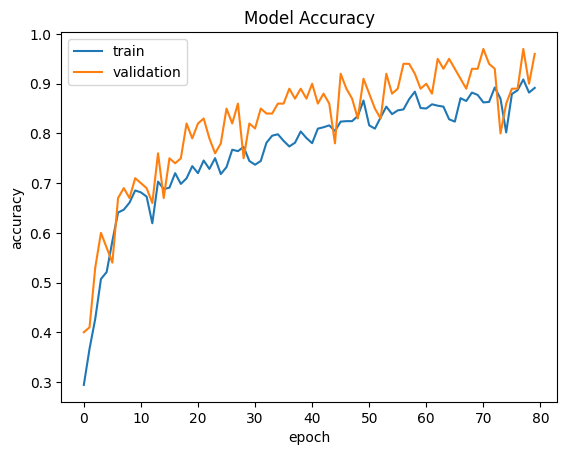

In [8]:
import matplotlib.pyplot as plt
score = model.evaluate(test,verbose=0)
print('Test loss= ',score[0])
print('Test accuracy= ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')